# Simple Linear Regression Modeling

In [1]:
import pandas as pd

In [2]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

taiwan_real_estate.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
118,1583.7220,3,15 to 30,9.258699
315,1756.4110,2,15 to 30,8.260212
9,1783.1800,3,15 to 30,6.686838
243,204.1705,8,30 to 45,14.583964
95,104.8101,5,0 to 15,15.673222


## A tale of two variables

### Visualizing two numeric variables

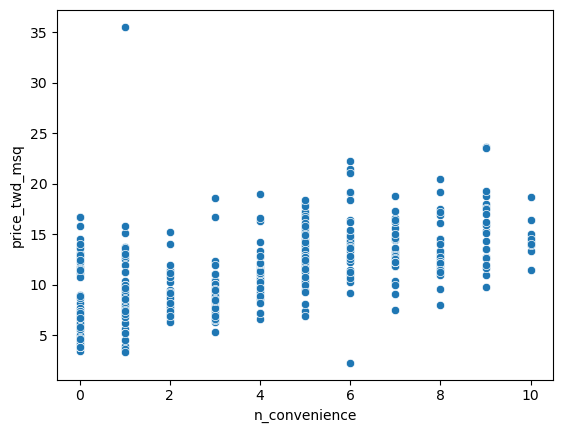

In [3]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(
    data=taiwan_real_estate,
    y='price_twd_msq',
    x='n_convenience'
)

# Show the plot
plt.show()

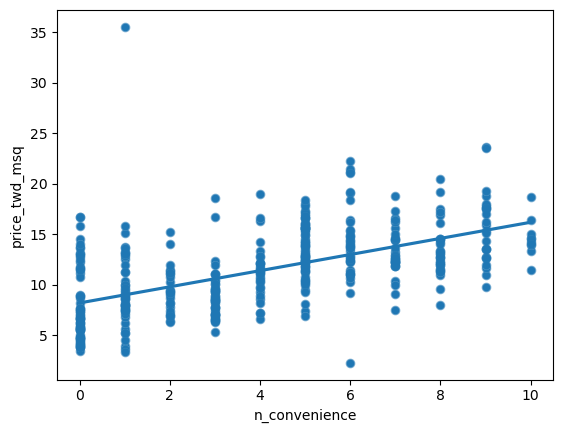

In [4]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## Fitting a linear regression

### Linear regression with ols()

In [7]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Categorical explanatory variables

### Visualizing numeric vs. categorical

/home/israel/miniconda3/envs/ds1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


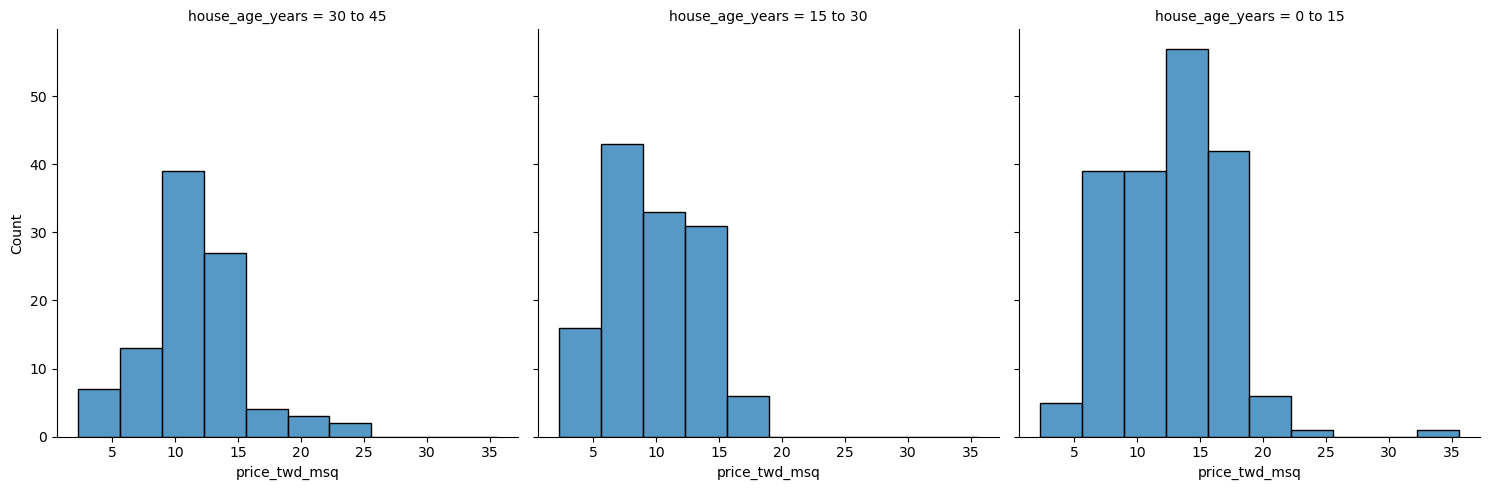

In [9]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         bins=10,
         col='house_age_years')

# Show the plot
plt.show()

### Calculating means by category

In [10]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


### Linear regression with a categorical explanatory variable

In [11]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [12]:
# Create the model, fit it
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
